In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

NV = pd.read_csv(r"alldataNV.csv")
AC = pd.read_csv(r"alldataAC.csv")
X_NV = NV.iloc[:,0:6]
y_NV = NV.iloc[:,6]
X_AC = AC.iloc[:,0:7]
y_AC = AC.iloc[:,7:9]

X_NV = scaler.fit_transform(X_NV)
X_AC = scaler.fit_transform(X_AC)

X_train_NV, X_test_NV, y_train_NV, y_test_NV = train_test_split(X_NV, y_NV, test_size = 0.2, random_state = 42, shuffle= True)
X_train_AC, X_test_AC, y_train_AC, y_test_AC = train_test_split(X_AC, y_AC, test_size = 0.2, random_state = 42, shuffle= True)


<Axes: >

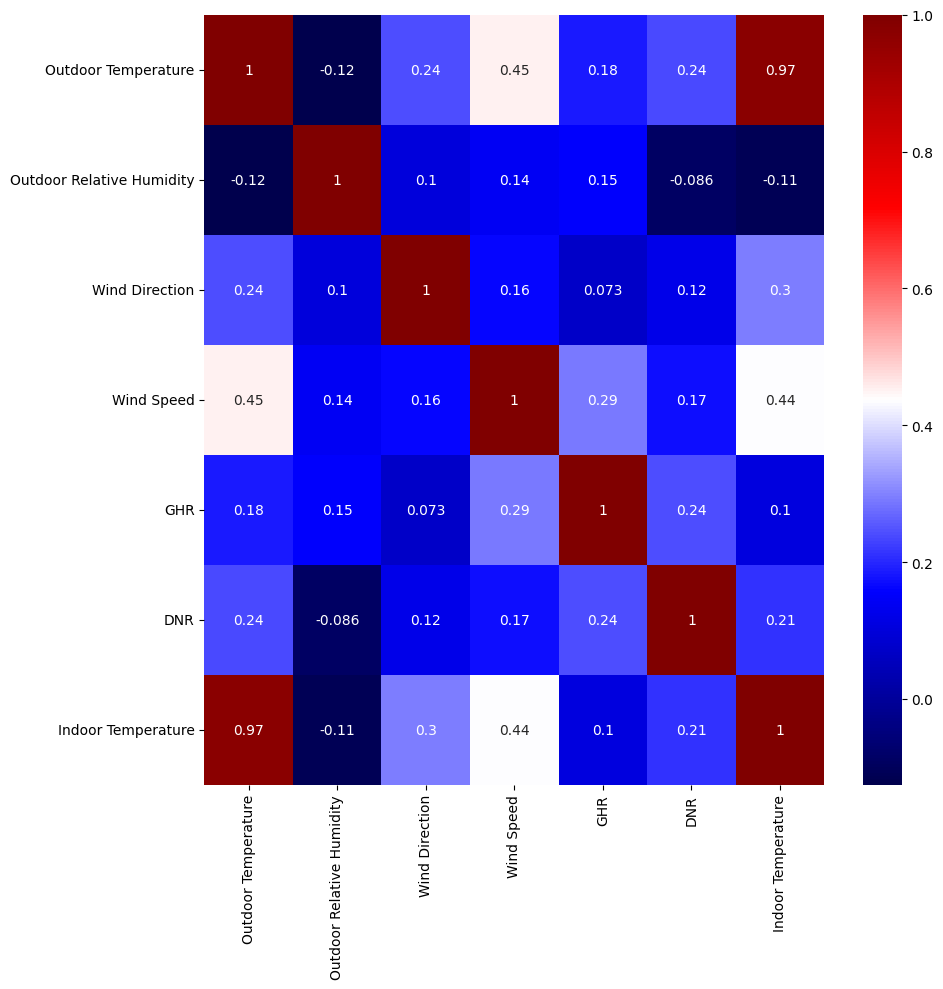

In [6]:
figure(figsize=(10, 10), dpi=100)
sns.heatmap(NV.corr(), annot= True, cmap = 'seismic')

<Axes: >

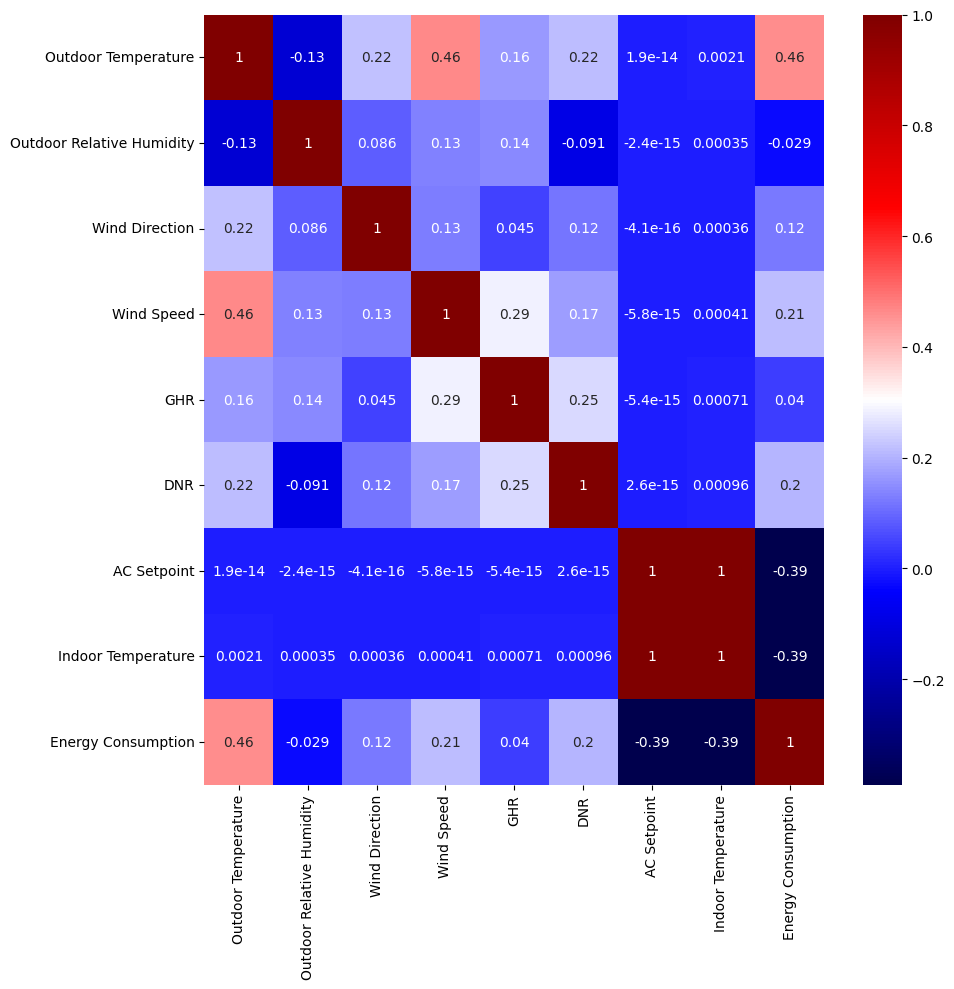

In [7]:
figure(figsize=(10, 10), dpi=100)
sns.heatmap(AC.corr(), annot= True, cmap = 'seismic')

In [8]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history

Epoch 1/20
46/46 [==============================] - 1s 3ms/step - loss: 6.2694 - mean_squared_logarithmic_error: 6.2479
Epoch 2/20
46/46 [==============================] - 0s 2ms/step - loss: 2.1987 - mean_squared_logarithmic_error: 2.1898
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 0.5525 - mean_squared_logarithmic_error: 0.5499
Epoch 4/20
46/46 [==============================] - 0s 2ms/step - loss: 0.1512 - mean_squared_logarithmic_error: 0.1512
Epoch 5/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0733 - mean_squared_logarithmic_error: 0.0734
Epoch 6/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0596 - mean_squared_logarithmic_error: 0.0596
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0553 - mean_squared_logarithmic_error: 0.0551
Epoch 8/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0523 - mean_squared_logarithmic_error: 0.0522
Epoch 9/20
46/46 [======================

KeyError: 'val_mean_squared_logarithmic_error'

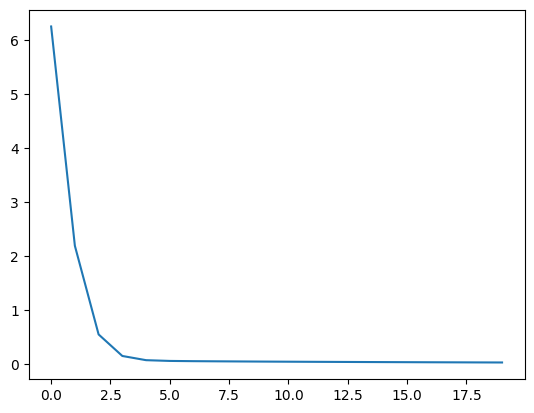

In [9]:
model_NV = Sequential()
model_NV.add(Dense(12, input_dim=6, activation='relu'))
model_NV.add(Dense(24, activation='relu'))
model_NV.add(Dense(48, activation='relu'))
model_NV.add(Dense(1, activation='linear'))
msle = MeanSquaredLogarithmicError()
model_NV.compile(loss='msle', optimizer='adam', metrics=msle)
history_NV=model_NV.fit(X_train_NV, y_train_NV, epochs=20, batch_size=64)
accuracy = model_NV.evaluate(X_test_NV, y_test_NV)
plot_history(history_NV, 'mean_squared_logarithmic_error')

Epoch 1/20
534/534 [==============================] - 5s 3ms/step - loss: 0.6291 - mean_squared_logarithmic_error: 0.6289
Epoch 2/20
534/534 [==============================] - 1s 3ms/step - loss: 0.0118 - mean_squared_logarithmic_error: 0.0118
Epoch 3/20
534/534 [==============================] - 1s 3ms/step - loss: 0.0052 - mean_squared_logarithmic_error: 0.0052
Epoch 4/20
534/534 [==============================] - 1s 3ms/step - loss: 0.0022 - mean_squared_logarithmic_error: 0.0022
Epoch 5/20
534/534 [==============================] - 2s 3ms/step - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012
Epoch 6/20
534/534 [==============================] - 2s 4ms/step - loss: 7.1162e-04 - mean_squared_logarithmic_error: 7.1155e-04
Epoch 7/20
534/534 [==============================] - 2s 3ms/step - loss: 5.9754e-04 - mean_squared_logarithmic_error: 5.9759e-04
Epoch 8/20
534/534 [==============================] - 1s 3ms/step - loss: 5.6810e-04 - mean_squared_logarithmic_error: 5.6815e-04


KeyError: 'val_mean_squared_logarithmic_error'

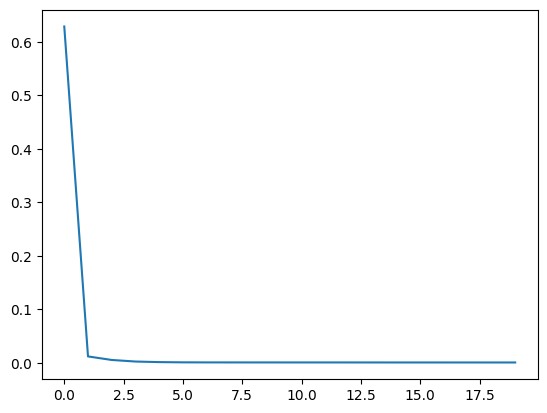

In [19]:

model_AC = Sequential()
model_AC.add(Dense(12, input_dim=7, activation='relu'))
model_AC.add(Dense(12, activation='relu'))
model_AC.add(Dense(24, activation='relu'))
model_AC.add(Dense(24, activation='relu'))
model_AC.add(Dense(12, activation='relu'))
model_AC.add(Dense(2, activation='linear'))
msle = MeanSquaredLogarithmicError()
model_AC.compile(loss='msle', optimizer='adam', metrics=msle)
history_AC=model_AC.fit(X_train_AC, y_train_AC, epochs=20, batch_size=64)
accuracy = model_AC.evaluate(X_test_AC, y_test_AC)
plot_history(history_AC, 'mean_squared_logarithmic_error')

115/115 [==============================] - 0s 1ms/step


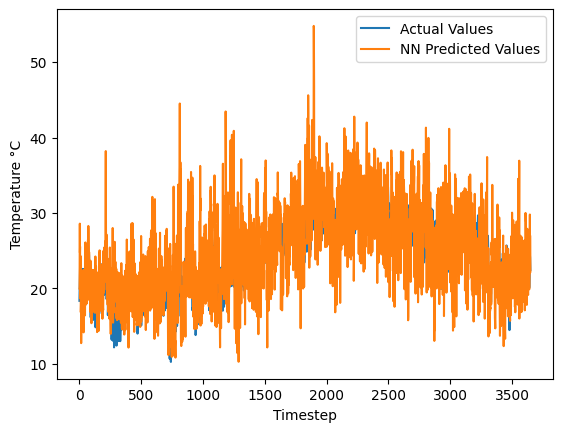

In [20]:
plt.plot(y_NV, label = 'Actual Values')
X_NV = scaler.fit_transform(X_NV)
plt.plot(model_NV.predict(X_NV)[:,0] , label = 'NN Predicted Values')
plt.xlabel('Timestep')  # Label for the x-axis
plt.ylabel('Temperature °C')  # Label for the y-axis
plt.legend()
plt.show()

1335/1335 [==============================] - 2s 2ms/step


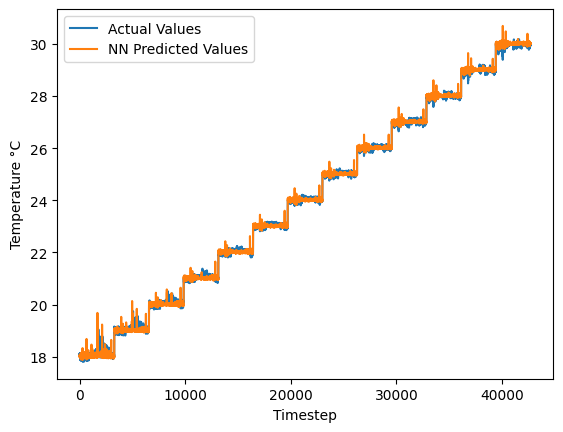

In [21]:
plt.plot(y_AC.iloc[:,0] , label = 'Actual Values')
X_AC = scaler.fit_transform(X_AC)
plt.plot(model_AC.predict(X_AC)[:,0]  , label = 'NN Predicted Values')


plt.xlabel('Timestep')  # Label for the x-axis
plt.ylabel('Temperature °C')  # Label for the y-axis
plt.legend()
plt.show()

1335/1335 [==============================] - 5s 4ms/step


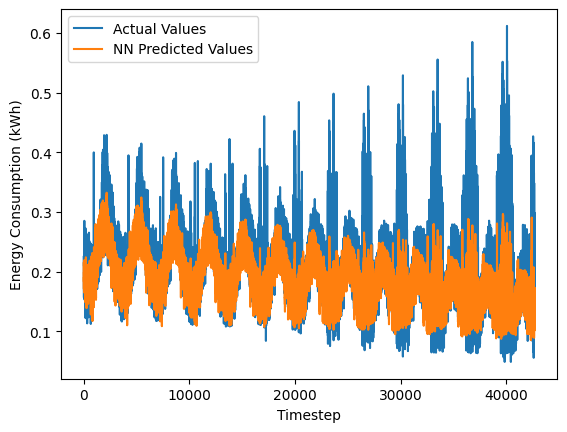

In [23]:
plt.plot(y_AC.iloc[:,1], label = 'Actual Values')
X_AC = scaler.fit_transform(X_AC)
plt.plot(model_AC.predict(X_AC)[:,1], label = 'NN Predicted Values')
plt.xlabel('Timestep')  # Label for the x-axis
plt.ylabel('Energy Consumption (kWh)')  # Label for the y-axis
plt.legend()
plt.show()